In [1]:
import sys
print(sys.version)

3.6.5 | packaged by conda-forge | (default, Apr  6 2018, 13:44:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]


In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import math

In [24]:
# Importing the data set and creating a new column, route
# duplicates have been removed on excel for speeding up the execution time of the code

df = pd.read_excel('dfdist.xlsx') 
df["route"] = df["City1"] + ' to ' + df["City2"]
df['log_MaxShare'] = np.log(df.MaxShare)
df.head()

,Year,Quarter,Avg_mkt_fare,City1ID,City2ID,City1,City2,AirlineID,Airline,Passengers,...,AvgFare,MinFare,MinShare,MaxFare,MaxShare,3xShare,AirlineType,distance,route,log_MaxShare
0,1996,1,274.248206,30135,30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",19977,UA,8670,...,269.084660,125,0.166090,425,0.197232,0.341407,non-LCC,NaN,"Allentown/Bethlehem/Easton, PA to Chicago, IL",-1.623375
1,1996,1,89.763371,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",19393,WN,61090,...,80.447766,75,0.730561,125,0.268129,0.000000,LCC,580.0,"Albuquerque, NM to Dallas/Fort Worth, TX",-1.316287
2,1996,1,89.763371,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",19805,AA,29980,...,106.834189,75,0.409273,150,0.057038,0.040694,non-LCC,580.0,"Albuquerque, NM to Dallas/Fort Worth, TX",-2.864037
3,1996,1,80.971723,30140,30466,"Albuquerque, NM","Phoenix, AZ",19393,WN,37920,...,79.506408,100,1.000000,100,1.000000,0.000000,LCC,328.0,"Albuquerque, NM to Phoenix, AZ",0.000000
4,1996,1,80.971723,30140,30466,"Albuquerque, NM","Phoenix, AZ",19991,HP,6030,...,87.252239,75,0.376451,125,0.094527,0.011609,non-LCC,328.0,"Albuquerque, NM to Phoenix, AZ",-2.358866


In [25]:
df.describe()

,Year,Quarter,Avg_mkt_fare,City1ID,City2ID,AirlineID,Passengers,MarketShare,AvgFare,MinFare,MinShare,MaxFare,MaxShare,3xShare,distance,log_MaxShare
count,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000,1.282700e+04,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000,7744.000000,12827.000000
mean,2003.097996,2.396585,186.355515,31485.866687,32170.645825,19790.781477,2.773708e+04,0.485657,186.490405,99.777812,0.269597,301.681999,0.207823,0.168566,454.485925,-1.952707
std,5.497287,1.110795,89.378159,1241.764742,1384.766646,973.925658,4.626947e+04,0.272147,91.765367,33.915348,0.237739,173.082787,0.214521,0.189033,164.297882,0.824549
min,1996.000000,1.000000,56.425733,30135.000000,30158.000000,-1.000000,1.160000e+03,0.100038,51.495686,75.000000,0.050000,75.000000,0.050000,0.000000,148.000000,-2.995732
25%,1998.000000,1.000000,90.184819,30615.000000,30928.000000,19393.000000,8.740000e+03,0.241473,90.742457,75.000000,0.086977,125.000000,0.069792,0.002623,306.000000,-2.662232
50%,2003.000000,2.000000,226.223055,31057.000000,31703.000000,19805.000000,1.529000e+04,0.439841,218.515794,75.000000,0.171893,300.000000,0.114818,0.059361,441.000000,-2.164403
75%,2007.000000,3.000000,258.419636,32211.000000,33244.000000,19991.000000,2.938000e+04,0.727486,260.715847,125.000000,0.388630,450.000000,0.263990,0.333436,626.000000,-1.331843
max,2014.000000,4.000000,426.635990,35412.000000,35412.000000,21177.000000,1.273470e+06,1.000000,530.624088,325.000000,1.000000,900.000000,1.000000,0.748515,743.000000,0.000000


/Users/auguste/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


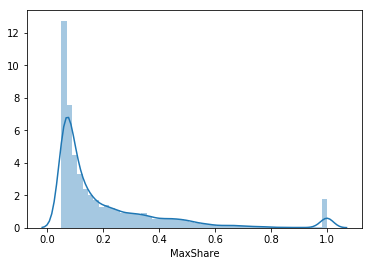

In [26]:
sns.distplot(df['MaxShare']);

In [29]:
# Let's start by looking at the continuous features and their relationship

df.columns.values.tolist()

['Year',
 'Quarter',
 'Avg_mkt_fare',
 'City1ID',
 'City2ID',
 'City1',
 'City2',
 'AirlineID',
 'Airline',
 'Passengers',
 'MarketShare',
 'AvgFare',
 'MinFare',
 'MinShare',
 'MaxFare',
 'MaxShare',
 '3xShare',
 'AirlineType',
 'distance',
 'route',
 'log_MaxShare']

In [33]:
# leaving Airline type to plot the below graphs
feature_continuous = ['Year',
 'Quarter',
 'Avg_mkt_fare',
 'Passengers',
 'MarketShare',
 'AvgFare',
 'MinFare',
 'MinShare',
 'MaxFare',
 'MaxShare',
 '3xShare',
 'AirlineType']
df[feature_continuous].describe()

,Year,Quarter,Avg_mkt_fare,Passengers,MarketShare,AvgFare,MinFare,MinShare,MaxFare,MaxShare,3xShare
count,12827.000000,12827.000000,12827.000000,1.282700e+04,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000,12827.000000
mean,2003.097996,2.396585,186.355515,2.773708e+04,0.485657,186.490405,99.777812,0.269597,301.681999,0.207823,0.168566
std,5.497287,1.110795,89.378159,4.626947e+04,0.272147,91.765367,33.915348,0.237739,173.082787,0.214521,0.189033
min,1996.000000,1.000000,56.425733,1.160000e+03,0.100038,51.495686,75.000000,0.050000,75.000000,0.050000,0.000000
25%,1998.000000,1.000000,90.184819,8.740000e+03,0.241473,90.742457,75.000000,0.086977,125.000000,0.069792,0.002623
50%,2003.000000,2.000000,226.223055,1.529000e+04,0.439841,218.515794,75.000000,0.171893,300.000000,0.114818,0.059361
75%,2007.000000,3.000000,258.419636,2.938000e+04,0.727486,260.715847,125.000000,0.388630,450.000000,0.263990,0.333436
max,2014.000000,4.000000,426.635990,1.273470e+06,1.000000,530.624088,325.000000,1.000000,900.000000,1.000000,0.748515


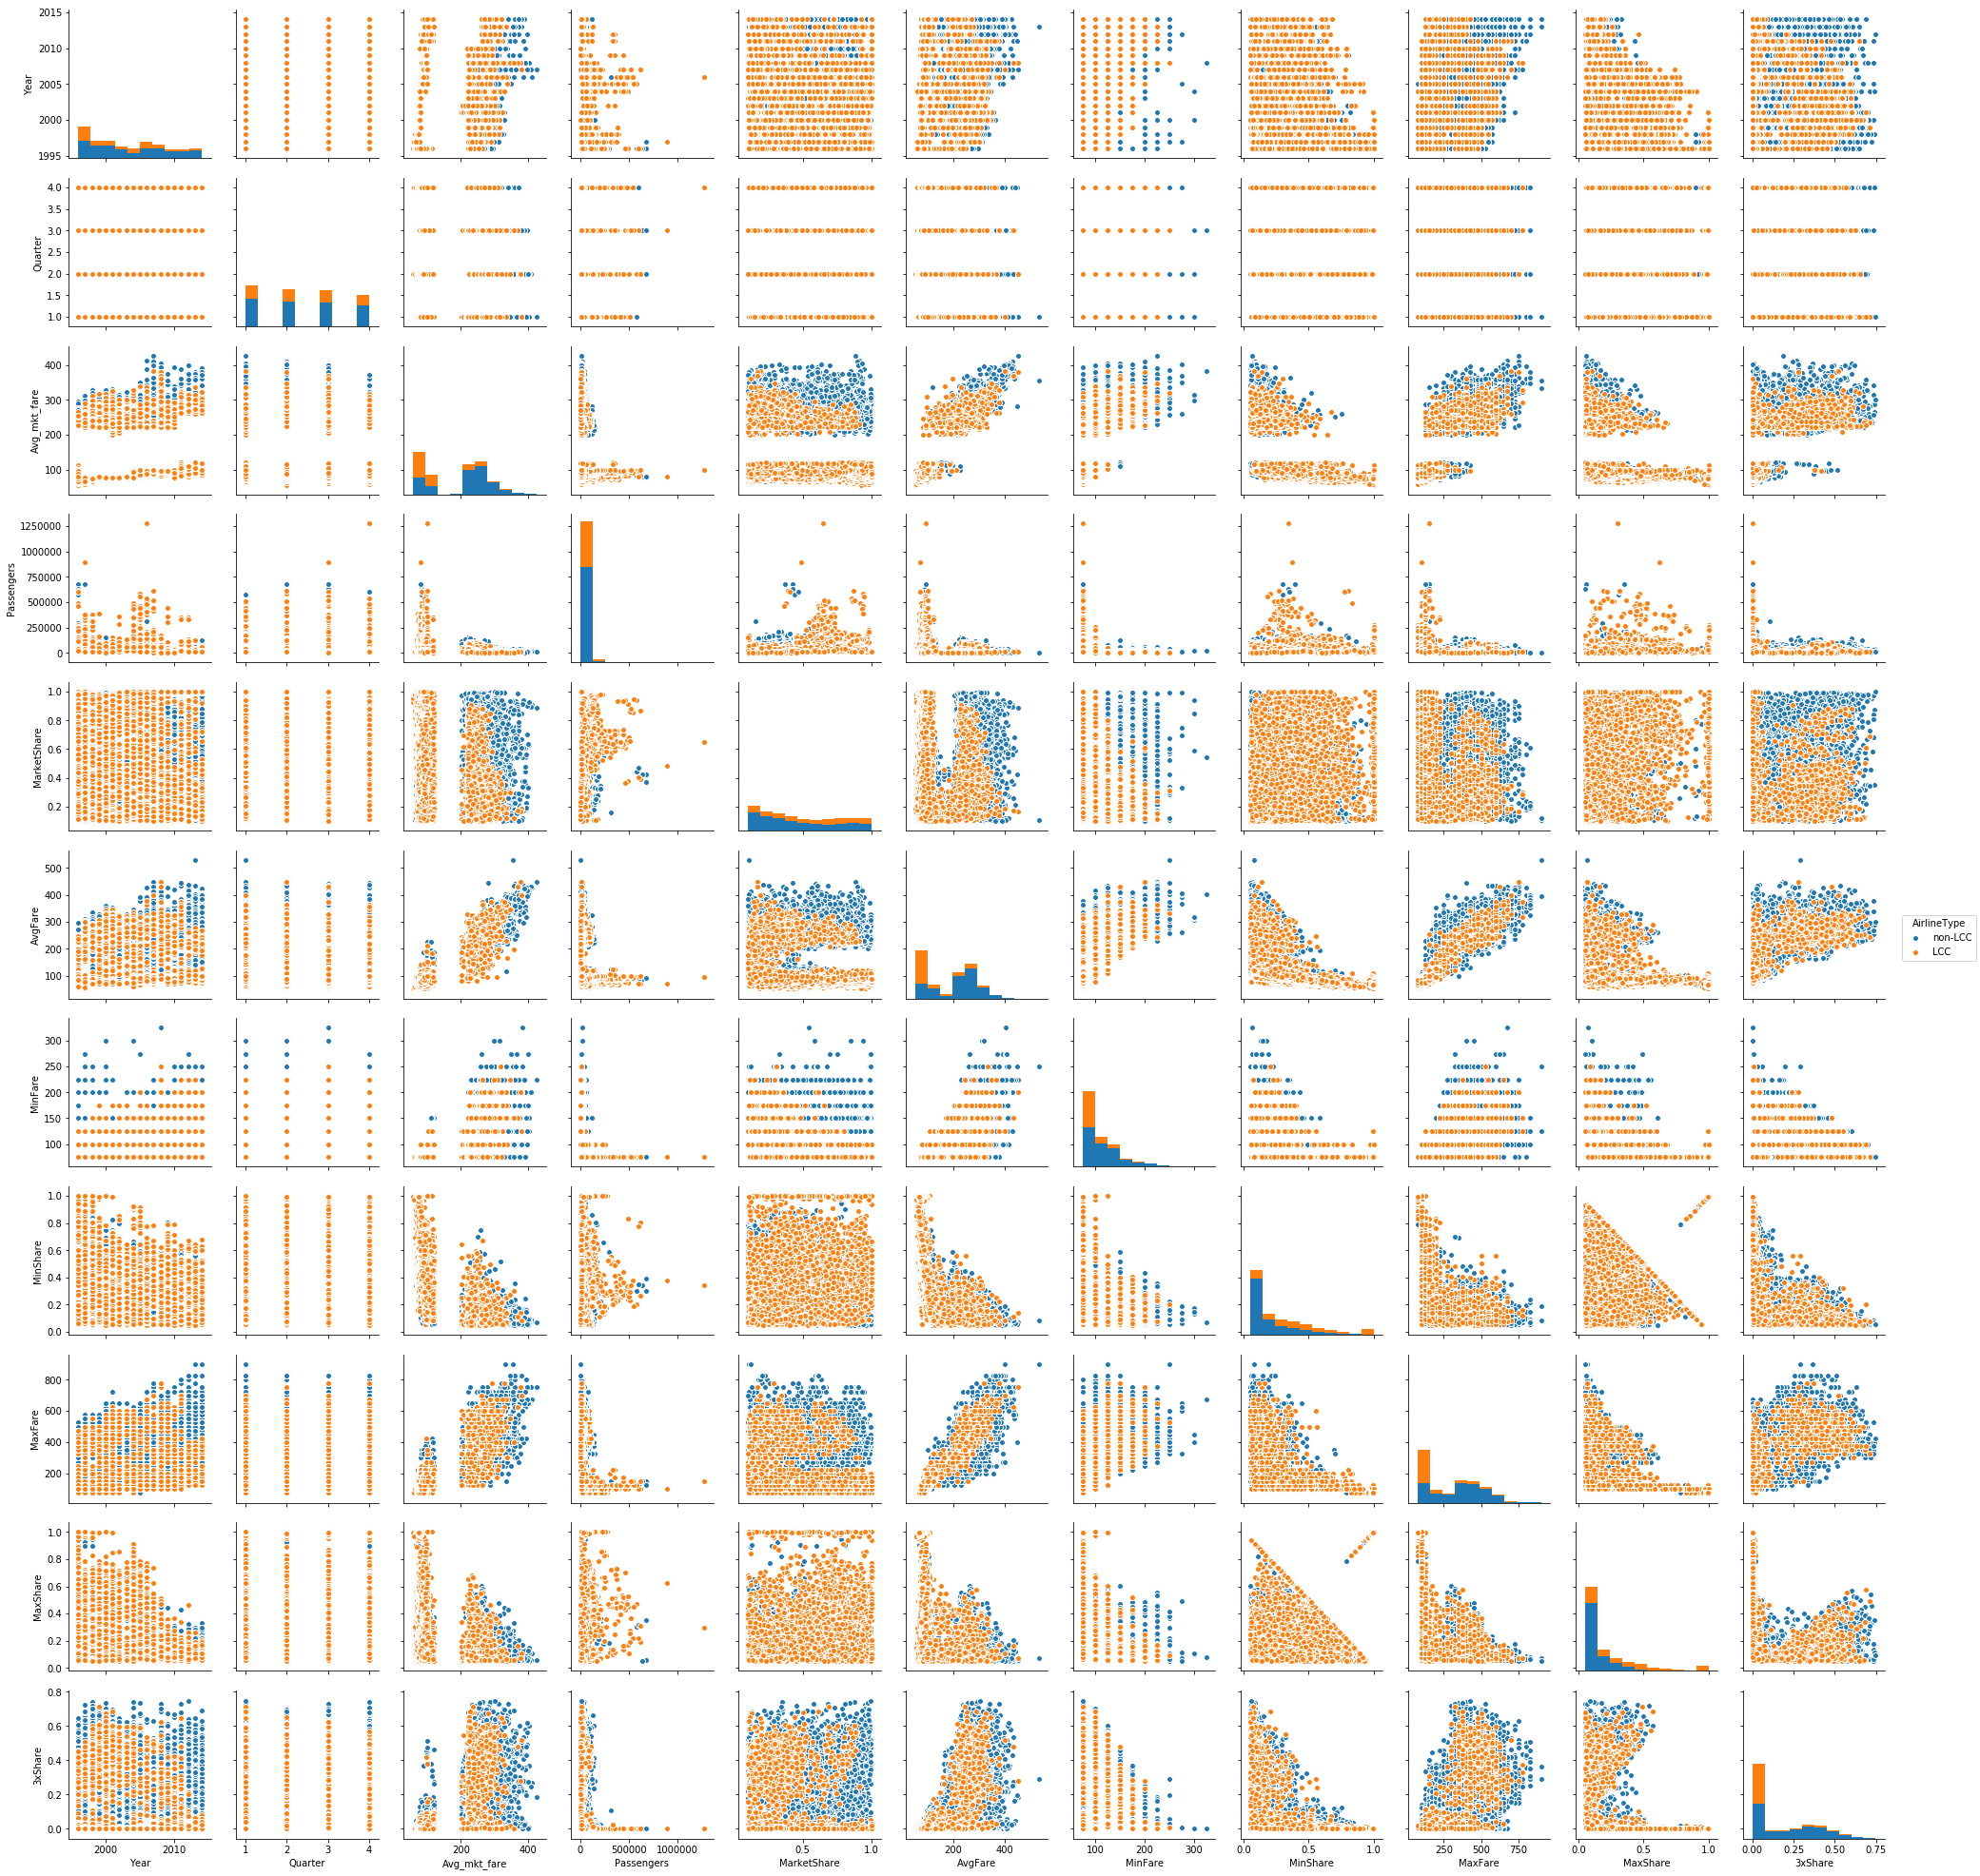

In [34]:
# Lets look at the variables dependance
sns.pairplot(df[feature_continuous], hue="AirlineType")
plt.show()

No clear linear relationship between MaxShare and the other continuous variables, perhaps the closest are passengers and 3xShare

Let's fit a linear regression. 

In [35]:
# Linear Regression
from sklearn import linear_model
model=linear_model.LinearRegression(fit_intercept=True)

In [39]:
feature_continuous = ['Year',
 'Quarter',
 'Avg_mkt_fare',
 'Passengers',
 'MarketShare',
 'AvgFare',
 'MinFare',
 'MinShare',
 'MaxFare',
 '3xShare']

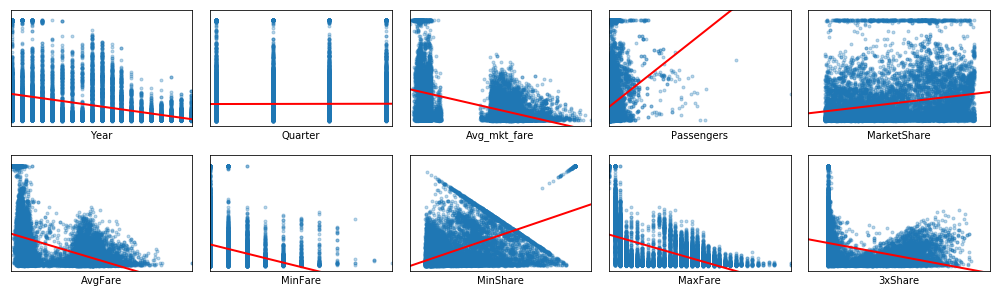

In [40]:
plt.figure(figsize=(14, 8))
y = np.array(df['MaxShare'])

for i in range(0, len(feature_continuous)):
    x = np.array(df[feature_continuous[i]])[:, np.newaxis]
    mini = float(x.min())
    maxi = float(x.max())
    x_pred = np.linspace(mini-2, maxi+2, 100)[:, np.newaxis]

    plt.subplot(4, 5, i + 1)
    model.fit(x, y)

    plt.plot(x, y, '.', alpha=0.3)
    plt.plot(x_pred, model.predict(x_pred), '-r', linewidth=2)
    plt.xlabel(feature_continuous[i])
    plt.xlim(x.min()-0.1,x.max()+0.1)
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, y.max() * 1.1)

plt.tight_layout()
plt.show()

Interesting but we need to do some statistics on the different regressions to identify interesting features !

In [41]:
X = df[feature_continuous]
X = sm.add_constant(X) 
y = df["MaxShare"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               MaxShare   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     978.0
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:30:09   Log-Likelihood:                 5182.0
No. Observations:               12827   AIC:                        -1.034e+04
Df Residuals:                   12816   BIC:                        -1.026e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.8412      0.655     16.550   

Looking at the p values close to 0, we can reject the hypothesis uppon which the coeff is null with a very low risk of being wrong for the Features (1,3,4,5,7,8,9,10) which are :

In [45]:
features =[]
for i in (0,2,3,4,6,7,8,9):
    print(feature_continuous[i])
    features.append(feature_continuous[i])

Year
Avg_mkt_fare
Passengers
MarketShare
MinFare
MinShare
MaxFare
3xShare


In [47]:
features;

Now let's look at these variables correlation

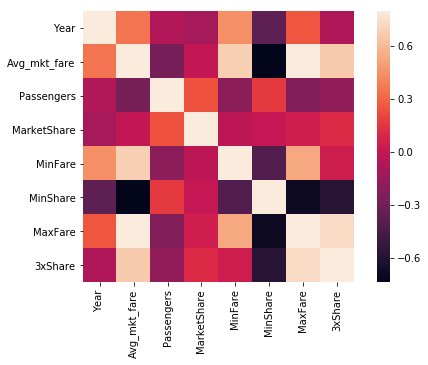

In [50]:
corrmat = df[features].corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

3xShare and MaxFare are clearly correlated. We'll drop the feature, as well as Avg_mkt_fare which is highly correlated to Max Fare, MinShare and MinFare. MinFare and MinShare are being very correlated to Maxfare, we'll take them out as well.

In [67]:
features = [el for el in features if el not in ('Avg_mkt_fare', '3xShare','MinFare','MinShare')]

Now Let's add the dummy variables AirlineType, route and Airline to run an OLS regression as well so we can identify the interesting features.

In [57]:
dummies1 = pd.get_dummies(df["Airline"]).iloc[:,1:]
dummies2 = pd.get_dummies(df["AirlineType"]).iloc[:,1:]
dummies3 = pd.get_dummies(df["route"]).iloc[:,1:]

# Adding them to the original data

df = pd.concat([df, dummies1,dummies2,dummies3], axis=1)

df.head()

,Year,Quarter,Avg_mkt_fare,City1ID,City2ID,City1,City2,AirlineID,Airline,Passengers,...,"San Francisco, CA (Metropolitan Area) to Santa Barbara, CA","San Francisco, CA (Metropolitan Area) to Seattle, WA","San Francisco, CA (Metropolitan Area) to Spokane, WA","Savannah, GA to Washington, DC (Metropolitan Area)","Seattle, WA to Spokane, WA","St. Louis, MO to Tulsa, OK","St. Louis, MO to Washington, DC (Metropolitan Area)","Syracuse, NY to Washington, DC (Metropolitan Area)","Tallahassee, FL to Tampa, FL (Metropolitan Area)","Tampa, FL (Metropolitan Area) to West Palm Beach/Palm Beach, FL"
0,1996,1,274.248206,30135,30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",19977,UA,8670,...,0,0,0,0,0,0,0,0,0,0
1,1996,1,89.763371,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",19393,WN,61090,...,0,0,0,0,0,0,0,0,0,0
2,1996,1,89.763371,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",19805,AA,29980,...,0,0,0,0,0,0,0,0,0,0
3,1996,1,80.971723,30140,30466,"Albuquerque, NM","Phoenix, AZ",19393,WN,37920,...,0,0,0,0,0,0,0,0,0,0
4,1996,1,80.971723,30140,30466,"Albuquerque, NM","Phoenix, AZ",19991,HP,6030,...,0,0,0,0,0,0,0,0,0,0


Now building a refinined features list :

In [58]:
df.columns.values.tolist()

['Year',
 'Quarter',
 'Avg_mkt_fare',
 'City1ID',
 'City2ID',
 'City1',
 'City2',
 'AirlineID',
 'Airline',
 'Passengers',
 'MarketShare',
 'AvgFare',
 'MinFare',
 'MinShare',
 'MaxFare',
 'MaxShare',
 '3xShare',
 'AirlineType',
 'distance',
 'route',
 'log_MaxShare',
 'A7',
 'AA',
 'AS',
 'B6',
 'CO',
 'DH',
 'DL',
 'F9',
 'FL',
 'G4',
 'HP',
 'J7',
 'JI',
 'KP',
 'NJ',
 'NK',
 'NW',
 'OE',
 'QQ',
 'QX',
 'RP',
 'RU',
 'SX',
 'TW',
 'TZ',
 'UA',
 'US',
 'VX',
 'W7',
 'W9',
 'WN',
 'WV',
 'XJ',
 'YV',
 'YX',
 'ZW',
 'non-LCC',
 'Albany, NY to Washington, DC (Metropolitan Area)',
 'Albuquerque, NM to Dallas/Fort Worth, TX',
 'Albuquerque, NM to Denver, CO',
 'Albuquerque, NM to El Paso, TX',
 'Albuquerque, NM to Farmington, NM',
 'Albuquerque, NM to Kansas City, MO',
 'Albuquerque, NM to Las Vegas, NV',
 'Albuquerque, NM to Los Angeles, CA (Metropolitan Area)',
 'Albuquerque, NM to Phoenix, AZ',
 'Albuquerque, NM to Salt Lake City, UT',
 'Albuquerque, NM to San Antonio, TX',
 'Albuquerq

In [74]:
features_refined = [el for el in df.columns.values.tolist() if el not in 
                    ('Quarter', '3xShare','MinFare','AvgFare','Avg_mkt_fare',
                     'City1ID','City2ID','City1','City2','AirlineID','Airline','log_MaxShare','route','distance'
                     ,'AirlineType','MinShare','MaxShare')]

In [75]:
features_refined;

We have all of our features ! Now let's test if they are all significant !

In [78]:
# indexing the features instead of showing their names which is constraining in my reading
y = np.array(df['MaxShare'])

#x = np.array(dat[feature_list]) #crochets ?
x = [df[features_refined]]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for i in x[1:]:
        X = sm.add_constant(np.column_stack((i, X)))
    results = sm.OLS(y, X).fit()
    return results

In [79]:
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     43.32
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:59:13   Log-Likelihood:                 7851.8
No. Observations:               12827   AIC:                        -1.475e+04
Df Residuals:                   12349   BIC:                        -1.118e+04
Df Model:                         477                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0112      0.000    -38.271      0.0

In [80]:
features_final =[]
for i in (0,1,2,3,4,7,8,9,11,12,13,15,16,17,18,19,22,25,26,28,31,32,33,34,35,36,37,38,42,43,44,45,46,47,48,49,50,52,53,55,56,57,81,85,92,96,97,98,99,100,101,102,103,104,105,106,107,118,119,121,126,129,142,146,156,158,171,176,177,178,181,182,186,190,191,192,195,201,206,208,209,212,213,218,221,223,224,225,228,233,235,238,240,241,244,247,249,251,253,254,255,258,259,261,263,270,272,278,287,288,293,294,295,296,297,299,314,316,321,322,323,324,327,329,334,335,338,339,340,341,344,346,347,351,352,354,355,358,369,371,372,374,376,379,381,382,387,388,390,391,398,403,404,407,408,409,410,411,412,413,414,415,417,422,425,431,434,436,439,441,444,445,451,452,453,454,455,459,460,461,465,466,467,468,470,471,473,478):
    features_final.append(features_refined[i])

Now let's test these refined features significance by doing another OLS regression

In [83]:
# indexing the features instead of showing their names which is constraining in my reading
y = np.array(df['MaxShare'])
x = [df[features_final]]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for i in x[1:]:
        X = sm.add_constant(np.column_stack((i, X)))
    results = sm.OLS(y, X).fit()
    return results

In [84]:
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:11:21   Log-Likelihood:                 7523.5
No. Observations:               12827   AIC:                        -1.467e+04
Df Residuals:                   12639   BIC:                        -1.327e+04
Df Model:                         187                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0101      0.000    -39.879      0.0

Looking at the p values above, we can now create a definitve list of the features we are going to use in our models below :

In [85]:
definitive_features =[]
for i in (0,1,2,3,4,6,8,11,15,16,17,19,21,23,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,186,187):
    definitive_features.append(features_final[i])

Let's quickly test again the significance of the refined list of features :

In [88]:
# indexing the features instead of showing their names which is constraining in my reading
y = np.array(df['MaxShare'])

#x = np.array(dat[feature_list]) #crochets ?
x = [df[definitive_features]]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for i in x[1:]:
        X = sm.add_constant(np.column_stack((i, X)))
    results = sm.OLS(y, X).fit()
    return results

In [89]:
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:18:58   Log-Likelihood:                 7508.3
No. Observations:               12827   AIC:                        -1.468e+04
Df Residuals:                   12657   BIC:                        -1.341e+04
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0100      0.000    -40.238      0.0

Perfect, all the p values are below 5%, let's now move on to defining our different models ! :

# Prediction

In [92]:
# importing ML libraries

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

I'll create two datasets as having run the initial model already, I have realised that splitting the dataset randomly into a train and testing set is way more accurate and less biased than splitting it according to the years. Since the years are a feature, we cannot just split our dataset by the years because our model may learn well, but will perform poorly in terms of testing, even if we use models which can take care of overfitting like Lasso or Ridge. I'm keeping the years split for comparison

In [99]:
data_ml1 = df[definitive_features] #Model 1 : split by years
data_ml1 = pd.concat([data_ml1, df[['MaxShare']]], axis=1)

data_ml2 = df[definitive_features] #Model 2 : split randomly (80%/20%)
data_ml2 = pd.concat([data_ml2, df[['MaxShare']]], axis=1)

In [100]:
data_ml1.head()

,Year,Passengers,MarketShare,MaxFare,A7,CO,F9,J7,NK,QQ,...,"Sacramento, CA to Spokane, WA","Salt Lake City, UT to San Diego, CA","Salt Lake City, UT to Tucson, AZ","San Antonio, TX to Tulsa, OK","San Diego, CA to San Francisco, CA (Metropolitan Area)","San Diego, CA to Tucson, AZ","San Francisco, CA (Metropolitan Area) to Seattle, WA","Seattle, WA to Spokane, WA","Tampa, FL (Metropolitan Area) to West Palm Beach/Palm Beach, FL",MaxShare
0,1996,8670,0.840931,425,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.197232
1,1996,61090,0.632467,125,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.268129
2,1996,29980,0.310384,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.057038
3,1996,37920,0.858501,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
4,1996,6030,0.136518,125,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.094527


In [101]:
date = 2011

train1 = data_ml1[data_ml1['Year'] < date]
test1 = data_ml1[data_ml1['Year'] >= date]

In [102]:
y_train1 = train1['MaxShare']
x_train1 = train1.drop(['MaxShare'], axis=1).drop(['Year'], axis=1)
y_test1 = test1['MaxShare']
x_test1 = test1.drop(['MaxShare'], axis=1).drop(['Year'], axis=1)

In [103]:
train2, test2 = train_test_split(data_ml2, test_size=0.2) # splitting the dataset for the model 2

y_train2 = train2['MaxShare']
x_train2 = train2.drop(['MaxShare'], axis=1)
y_test2 = test2['MaxShare']
x_test2 = test2.drop(['MaxShare'], axis=1)

# Linear Regression Model

In [104]:
model1=linear_model.LinearRegression()
model2=linear_model.LinearRegression()

In [106]:
# Linear regression for 1st model 
model1.fit(x_train1,y_train1)
print("The coefficients :\n",model1.coef_,"\n \nintersect :",model1.intercept_)

The coefficients :
 [-6.43042505e-07  1.18546259e-01 -2.49634711e-04  8.01359114e-01
  4.02681573e-02  3.61286879e-02  2.26298666e-01  4.56629406e-01
 -3.22167322e-03  1.74323800e-01 -2.46750087e-02  7.98276385e-01
  2.84701817e-01  5.76125211e-02 -1.14083909e-01 -1.02204995e-01
  2.07048274e-01  6.89386163e-01 -1.28700118e-01 -2.40251065e-01
 -9.20931660e-02  3.07218380e-02 -1.15153145e-01 -2.85207831e-01
 -1.63463333e-01 -1.73480214e-01  5.04570033e-02 -2.74179973e-01
 -8.88334870e-02 -1.71546021e-01  3.02120291e-01  2.97530969e-01
  3.19959839e-02 -5.84499233e-01  7.52663184e-02 -1.69489209e-01
 -1.37480503e-01  1.77401216e-01 -2.10789376e-01 -1.07133678e-01
 -1.63924100e-01 -1.01090531e-01 -7.24028248e-02 -3.85392210e-02
 -1.76527204e-01  3.54807464e-02  2.67652306e-01  1.22287403e-01
  5.17250180e-02  5.51672225e-02  2.21229992e-01  4.94675925e-02
  9.90568962e-02  9.96147404e-02  1.30601704e-01  2.07522119e-03
  5.01610717e-02 -1.01236612e-01  3.04930882e-02  6.71452359e-02
  1.1

We can observe that the coefficients are all very small, this is going to be unsatisfying. We are going to have to use a regularizer to try and avoid this problem.

In [107]:
# Linear Regression for 2nd model

model2.fit(x_train2,y_train2)
print("Tes coefficients :\n",model2.coef_,"\n \nintersect :",model2.intercept_)

Tes coefficients :
 [-9.97203376e-03 -4.58585284e-07  9.05167154e-02 -1.88291925e-04
  7.55165938e-01  2.11560088e-02  6.43537963e-02  2.30959307e-01
  9.77640522e-02 -4.30605686e-02  1.06825743e-01 -4.89593618e-02
  7.55048375e-01  2.70996684e-01  5.70228287e-02 -2.03707732e-01
 -4.07706926e-02  1.52916294e-01  6.55410019e-01 -1.81483664e-01
 -2.46938599e-01 -1.87566291e-01  3.65995122e-02 -1.51624435e-01
 -3.08043895e-01 -1.06092058e-01 -2.15519649e-01  4.91475850e-02
 -3.54549891e-01 -1.21283357e-01 -2.28573371e-01  6.24268181e-01
  6.30391241e-01  4.52655582e-01 -1.31434044e-01  8.02260520e-02
 -2.08406860e-01 -1.39380779e-01  1.70541789e-01 -2.04455243e-01
 -1.21817480e-01 -2.80195299e-01 -1.26600787e-01 -1.14675107e-01
 -6.62906267e-02 -1.44043539e-01  4.97078477e-02  2.65623825e-01
  9.23395587e-02  6.08773433e-02  4.82357942e-02  1.90217403e-01
  8.66766379e-02  6.67848056e-02  1.41101763e-01  1.27185555e-01
  1.06253189e-01  5.64516254e-02 -1.50999408e-01  5.30116689e-02
  9.6

Looking at the predictions, we see that some are negative which is impossible. I'll set them as 0,05

In [108]:
predict1=model1.predict(x_test1)
predict1[predict1<0]=0.05
predict2=model2.predict(x_test2)
predict2[predict2<0]=0.05

In [109]:
print("mean squarred error model 1 :",np.mean((predict1-y_test1)**2))
print("mean squarred error model 2 :",np.mean((predict2-y_test2)**2))

mean squarred error model 1 : 0.020945670217478427
mean squarred error model 2 : 0.018972812544782804


In [110]:
print("Model 1 : R² value for the training & testing sets:",model1.score(x_train1,y_train1),model1.score(x_test1,y_test1))
print("Model 2 : R² value for the training & testing sets:",model2.score(x_train2,y_train2),model2.score(x_test2,y_test2))

Model 1 : R² value for the training & testing sets: 0.5760223606969505 -7.01941411866372
Model 2 : R² value for the training & testing sets: 0.6076525446726335 0.584692860330201


Here we can see the limit of model 1 already : the testing score is negative, which means either there is an intercept issue or the model is terribly fit

Model 2 provides a fairly okay training and testing score, let's look at the mean errors :

In [111]:
# Regarding mean errors regarding the predicted values :

from sklearn.metrics import mean_absolute_error
print("Model 1:",mean_absolute_error(predict1,y_test1))
print("Model 2:",mean_absolute_error(predict2,y_test2))

Model 1: 0.09312166270106675
Model 2: 0.0942754122379162


Both models share the same mean_absolute_error, 9.3 - 9.4 %.

Let's see if we can imporve the model with a Ridge Regressor. I'll run the model on a range of alphas and will select the one providing the best scores

In [159]:
alphas = np.logspace(-1,4,6)

model1 = linear_model.Ridge()
scores = [model1.set_params(alpha=alpha).fit(x_train1, y_train1).score(x_test1, y_test1) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
model1.alpha = best_alpha
model1.fit(x_train1, y_train1)

print("Best parameter for the Ridge :",best_alpha)
print(' ')
print("Model 1 score (R²) for the training set :",model1.score(x_train1,y_train1))
print("Model 1 score (R²) for the testingset :",model1.score(x_test1,y_test1))

Best parameter for the Ridge : 10000.0
 
Model 1 score (R²) for the training set : 0.30134010744385586
Model 1 score (R²) for the testingset : -4.7257039022111345


The score is even worse for the first model, which can be expected. I'm way more interested in seeing the regressor work for our second model :

In [160]:
alphas = np.logspace(-1,4,6)

model2 = linear_model.Ridge()
scores = [model2.set_params(alpha=alpha).fit(x_train2, y_train2).score(x_test2, y_test2) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
model2.alpha = best_alpha
model2.fit(x_train2, y_train2)

print("Best parameter for the Ridge :",best_alpha)
print(' ')
print("modèle 2 score (R²) pour le training set :",model2.score(x_train2,y_train2))
print("modèle 2 score (R²) pour le testing set :",model2.score(x_test2,y_test2))

Best parameter for the Ridge : 1.0
 
modèle 2 score (R²) pour le training set : 0.6057093500611608
modèle 2 score (R²) pour le testing set : 0.5857909406888621


Slighlty better scores for model 2, but I feel we can do a lot better with other models ! Let's see the mean absolute errors

In [161]:
predict1=model1.predict(x_test1)
predict1[predict1<0]=0.05
predict2=model2.predict(x_test2)
predict2[predict2<0]=0.05
print(" Mean absolute error :")
print("Model 1:",mean_absolute_error(predict1,y_test1))
print("Model 2:",mean_absolute_error(predict2,y_test2))

 Mean absolute error :
Model 1: 0.0976711770722771
Model 2: 0.09477293531672469


In [162]:
print("mean squarred error model 1 :",np.mean((predict1-y_test1)**2))
print("mean squarred error model 2 :",np.mean((predict2-y_test2)**2))

mean squarred error model 1 : 0.014177559349649278
mean squarred error model 2 : 0.019012135974990425


Mean absolute errors are not lower with the ridge regressor. I will now use a more powerfull model to predict the MaxShare variable, a decision tree model

# Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
Forest1=RandomForestRegressor(n_estimators=200, max_leaf_nodes=20, bootstrap=False)
Forest1.fit(x_train1,y_train1)
print("Score (R²) for model 1 training set :",Forest1.score(x_train1,y_train1))
print("Score (R²) for model 1 testing set :",Forest1.score(x_test1,y_test1))
print(' ')
Forest2=RandomForestRegressor(n_estimators=200, max_leaf_nodes=20, bootstrap=False)
Forest2.fit(x_train2,y_train2)
print("Score (R²) for model 2 training set : :",Forest2.score(x_train2,y_train2))
print("Score (R²) for model 2 testing set : :",Forest2.score(x_test2,y_test2))

Score (R²) for model 1 training set : 0.770871070708101
Score (R²) for model 1 testing set : -0.8057485818526056
 
Score (R²) for model 2 training set : : 0.7968599561797928
Score (R²) for model 2 testing set : : 0.7784108249047492


Scores are overall better than the linear regressor ! We can still see that the 1st model is performing poorly but the second one is getting very interesting ! Have we managed to lower the mean absolute error as well ?

In [150]:
predict1=Forest1.predict(x_test1)
predict1[predict1<0]=0.05
print(" Mean absolute error  :")
print(" Model 1 :",mean_absolute_error(predict1,y_test1))
print(" ")
predict2=Forest2.predict(x_test2)
predict2[predict2<0]=0.05
print(" mMean absolute error  :")
print(" Model 2 :",mean_absolute_error(predict2,y_test2))

 Mean absolute error  :
 Model 1 : 0.0535370108402551
 
 mMean absolute error  :
 Model 2 : 0.06670327008796434


Awesome, we've reduced the mean absolute error to 6.6% (for model 2) compared to 9.4% with the linear regressor.

I'm now suggesting we use another model which works great usually in cases like this one, the gradient booster regressor

# Another model suggestion : Gradient Booster

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [152]:
# gradient boosting for model 1
Boosting1=GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, max_leaf_nodes=50)
Boosting1.fit(x_train1,y_train1)
predict1=Boosting1.predict(x_test1)
predict1[predict1<0]=0.05
print("R² model 1 training :",Boosting1.score(x_train1,y_train1))
print("R² model 1 testing :",Boosting1.score(x_test1,y_test1))
print(" Absolute mean error :")
print(" Model 1 :",mean_absolute_error(predict1,y_test1))

R² model 1 training : 0.9131327213946515
R² model 1 testing : -0.8974942836401845
 Absolute mean error :
 Model 1 : 0.04928713353759648


Model 1 shows an awesome training score but still a poor testing score, let's look at the second model !

In [153]:
# gradient boosting for model 1
Boosting2=GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, max_leaf_nodes=50)
Boosting2.fit(x_train2,y_train2)
predict2=Boosting2.predict(x_test2)
predict2[predict2<0]=0.05
print("R² model 2 training : :",Boosting2.score(x_train2,y_train2))
print("R² model 2 testing ::",Boosting2.score(x_test2,y_test2))
print(" Absolute mean error :")
print(" Model 2 :",mean_absolute_error(predict2,y_test2))

R² model 2 training : : 0.9318025610184579
R² model 2 testing :: 0.8686468190025359
 Absolute mean error :
 Model 2 : 0.04992811726845882


Does it get any better than this ? Model 2 shows an amazing 0.93 training score and a 0.87 testing score ! With an absolute ean error of 4.99%, as opposed to 9.4% for the linear regressor and 6.6% for the decision tree !

Let's have a look at the top features in terms of importance:

<Figure size 432x288 with 0 Axes>

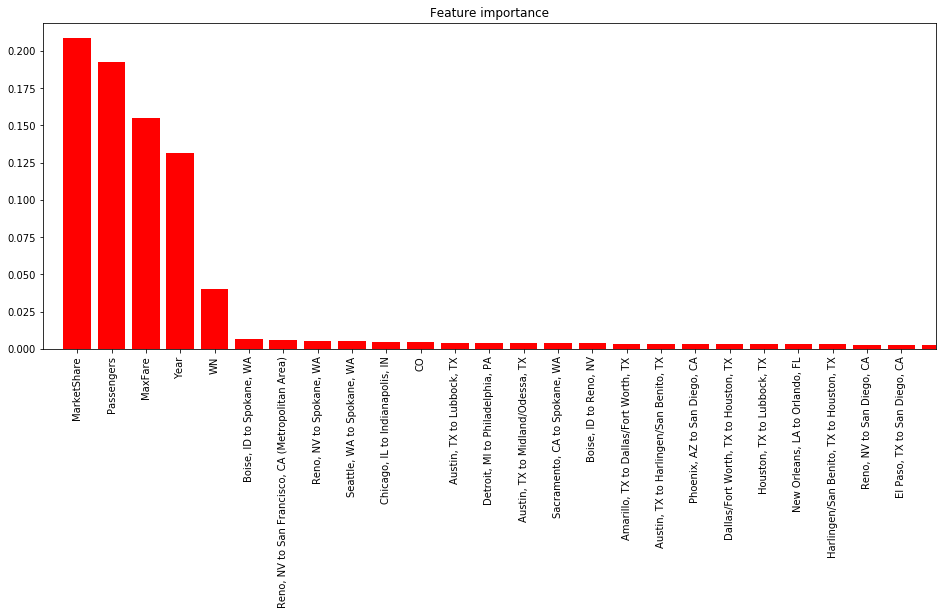

In [154]:
col2=np.array(x_train2.columns.values.tolist())
importances = Boosting2.feature_importances_
indices = np.argsort(importances)[::-1]


plt.clf()
plt.figure(figsize=(16,6))
plt.title("Feature importance")
plt.bar(range(x_train2.shape[1]), importances[indices],color="r", align="center")
plt.xticks(range(25), col1[indices][:25],rotation=90)
plt.xlim([-1, 25])
plt.show()

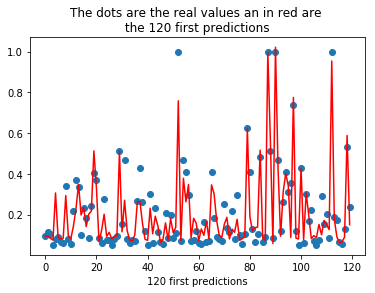

In [157]:
import  matplotlib.pyplot  as plt
import plotly.plotly as py

plt.plot(np.array(y_test2.head(120)),'o')
plt.plot(predict2[0:120],'r')
plt.title("The dots are the real values an in red are \n the 120 first predictions ")
plt.xlabel("120 first predictions")
plt.show()